In [16]:
# Data Processing
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

## Data Processing

In [2]:
df = pd.read_csv('dataset.csv')

df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2/5/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2/12/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2/19/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2/26/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,3/5/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,6/28/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,7/5/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,7/12/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,7/19/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [3]:
# Summary Statistics
df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [4]:
# Check for missing values
df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

Có thể thấy số lượng dữ liệu của cột "MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5" bị mising khá nhiều (từ 50% trở lên). Do đó, ta sẽ xóa các cột này đi.

In [5]:
df = df[['Store', 'Date', 'Temperature', 'Fuel_Price', 'Unemployment', 'IsHoliday', 'CPI']]

df.head()

,Store,Date,Temperature,Fuel_Price,Unemployment,IsHoliday,CPI
0,1,2/5/2010,42.31,2.572,8.106,False,211.096358
1,1,2/12/2010,38.51,2.548,8.106,True,211.242170
2,1,2/19/2010,39.93,2.514,8.106,False,211.289143
3,1,2/26/2010,46.63,2.561,8.106,False,211.319643
4,1,3/5/2010,46.50,2.625,8.106,False,211.350143


In [6]:
df.isna().sum()

Store             0
Date              0
Temperature       0
Fuel_Price        0
Unemployment    585
IsHoliday         0
CPI             585
dtype: int64

In [7]:
# Drop missing values from the dataframe
df = df.dropna()

In [8]:
len(df)

7605

Tiếp theo, tiến hành đổi đơn vị của các cột:
- "Temperature": độ F sang độ C

In [9]:
df['Temperature'] = df['Temperature'] - 32 
df['Temperature'] = df['Temperature'] * 5/9

In [10]:
df.head()

,Store,Date,Temperature,Fuel_Price,Unemployment,IsHoliday,CPI
0,1,2/5/2010,5.727778,2.572,8.106,False,211.096358
1,1,2/12/2010,3.616667,2.548,8.106,True,211.242170
2,1,2/19/2010,4.405556,2.514,8.106,False,211.289143
3,1,2/26/2010,8.127778,2.561,8.106,False,211.319643
4,1,3/5/2010,8.055556,2.625,8.106,False,211.350143


## EDA

Đầu tiên, ta sẽ đếm xem có tất cả bao nhiêu cửa hàng trong tập dữ liệu.

In [11]:
each_store = df['Store'].value_counts(ascending=True)

each_store = each_store.sort_index()

each_store

Store
1     169
2     169
3     169
4     169
5     169
6     169
7     169
8     169
9     169
10    169
11    169
12    169
13    169
14    169
15    169
16    169
17    169
18    169
19    169
20    169
21    169
22    169
23    169
24    169
25    169
26    169
27    169
28    169
29    169
30    169
31    169
32    169
33    169
34    169
35    169
36    169
37    169
38    169
39    169
40    169
41    169
42    169
43    169
44    169
45    169
Name: count, dtype: int64

Có thể thấy có 45 cửa hàng trong tập dữ liệu, mỗi cửa hàng sẽ có dữ liệu của 169 ngày.

Tiếp theo, ta sẽ vẽ biểu đồ để quan sát nhiệt độ trung bình của các cửa hàng trong 3 năm 2010, 2011, 2012, 2013

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

df_temp = df[['Store', 'Date', 'Temperature']]

df_temp = df_temp.set_index('Date')

df_temp.head()

,Store,Temperature
Date,,
2010-02-05,1,5.727778
2010-02-12,1,3.616667
2010-02-19,1,4.405556
2010-02-26,1,8.127778
2010-03-05,1,8.055556


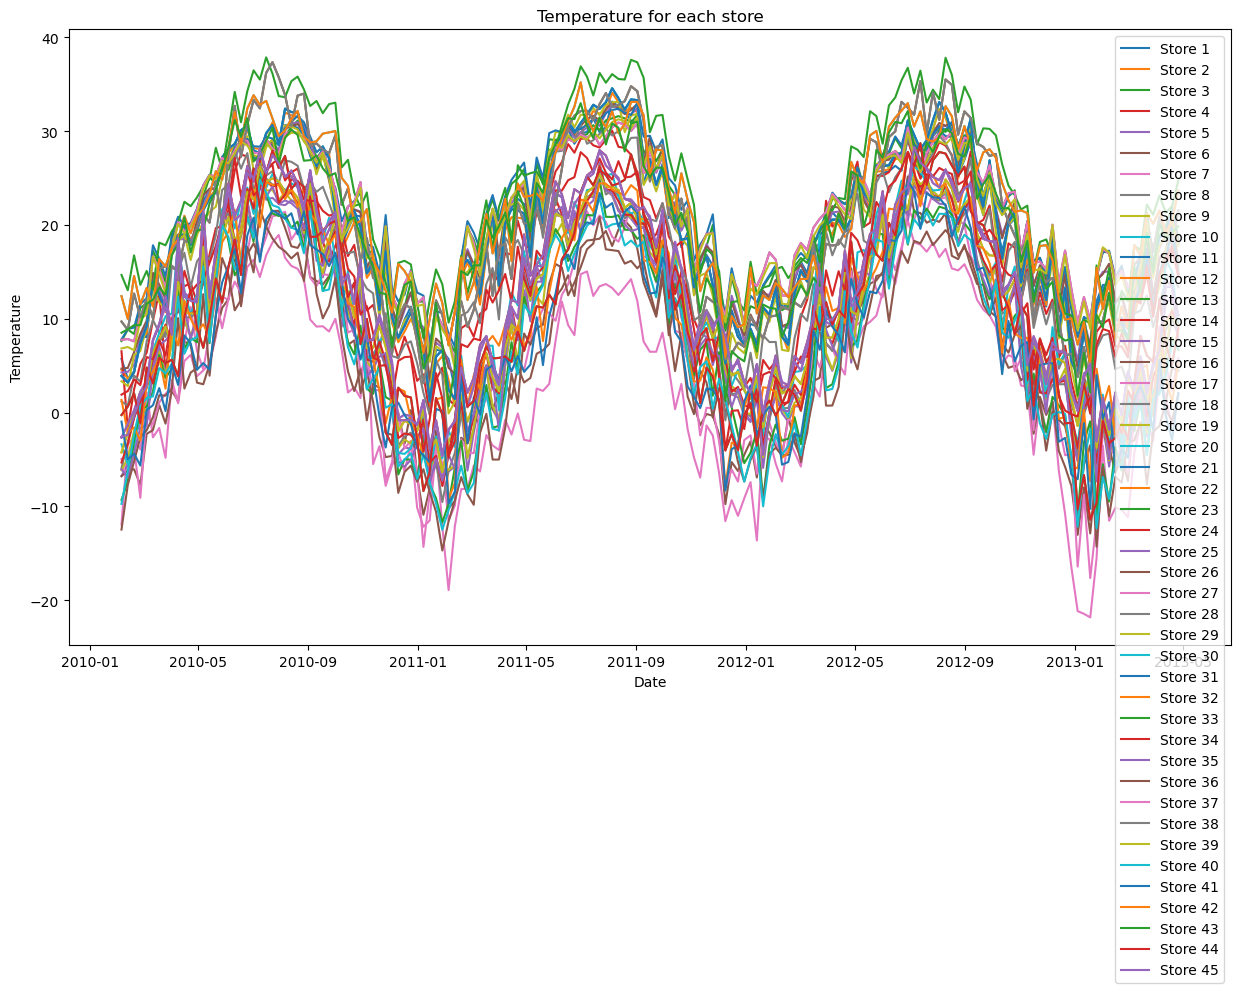

In [35]:
# Plot the temperature for each store
plt.figure(figsize=(15, 8))

for i in range(1, 46):
    plt.plot(df_temp.loc[df_temp['Store'] == i, 'Temperature'], label='Store {}'.format(i))

plt.legend()
plt.title('Temperature for each store')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()


Tiếp theo, ta sẽ quan sát biến động giá xăng trong 4 năm 2010, 2011, 2012, 2013

In [40]:
df_fuel = df[['Store', 'Fuel_Price', 'CPI']]

df_fuel = df_fuel.sort_values(by='Date', ascending=True)

df_fuel = df_fuel.reset_index(drop=True)

df_fuel = df_fuel.set_index('Date')

df_fuel

,Store,CPI
Date,,
2010-02-05,1,211.096358
2010-02-05,2,210.752605
2010-02-05,18,131.527903
2010-02-05,7,189.381697
2010-02-05,44,126.442065
...,...,...
2013-04-26,15,139.122613
2013-04-26,19,139.122613
2013-04-26,26,139.122613


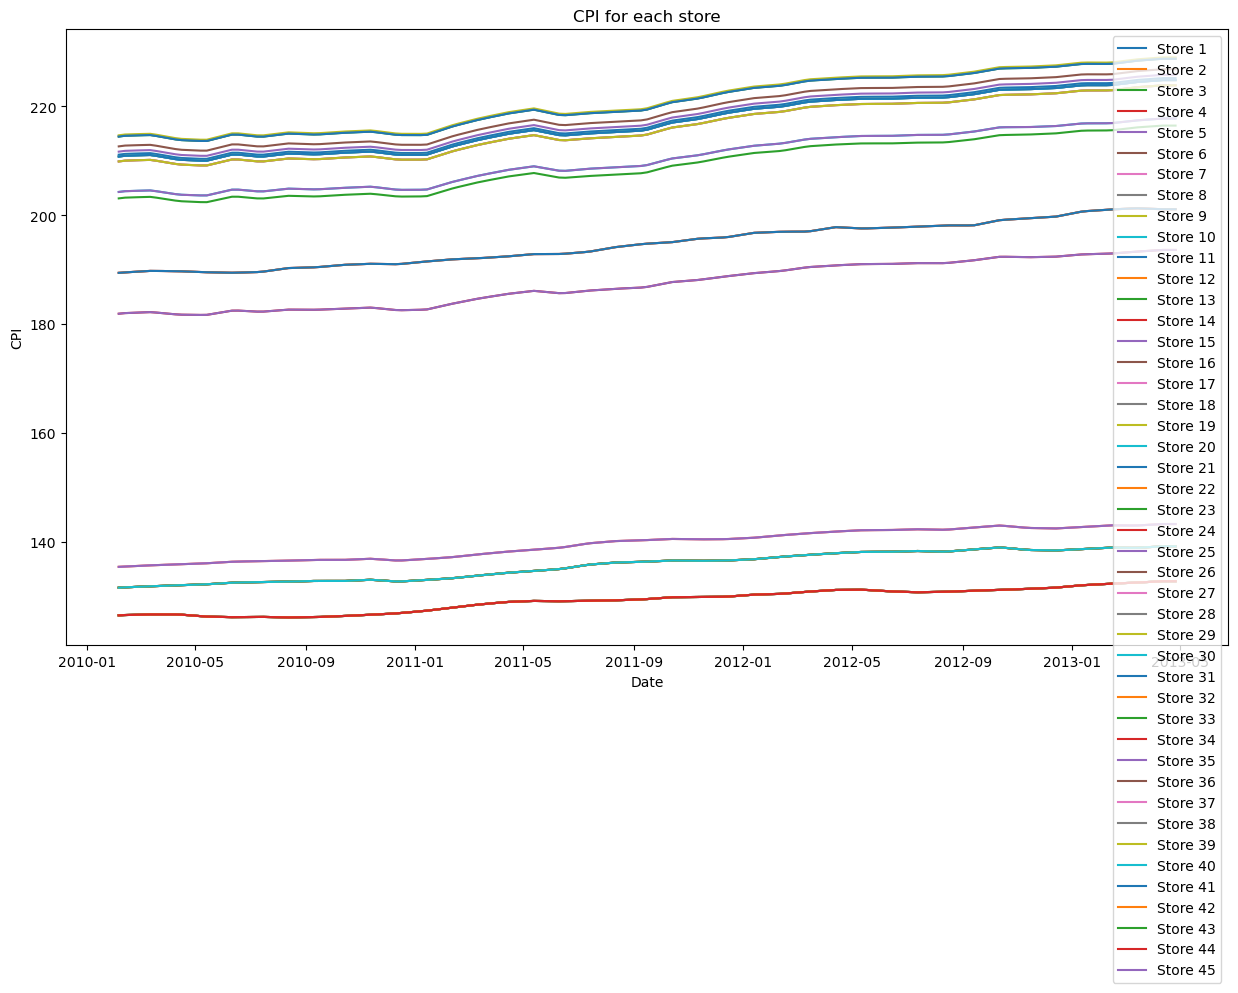

In [42]:
# Plot the temperature for each store
plt.figure(figsize=(15, 8))

for i in range(1, 46):
    plt.plot(df_fuel.loc[df_fuel['Store'] == i, 'CPI'], label='Store {}'.format(i))

plt.legend()
plt.title('CPI for each store')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.show()
